# Tree method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
train_data=pd.read_csv('Data-Train.csv', index_col=0)
test_data=pd.read_csv('Data-Test.csv', index_col=0)

test_data.head()

,productID,brandID,attribute1,attribute2,attribute3,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,meanCityLevel
0,77,38,3.0,100.0,2,5.670374,173.0,180.835683,165.459988,12.857143,4,26.960521,0.053158,2.958528,0.668194,0.148227,2.347953,2.638135,1.997034
1,47,30,4.0,100.0,9,5.191429,142.0,190.802856,138.995392,2.285714,5,33.111475,0.317086,3.292282,0.709143,0.272464,2.409795,3.973464,1.385002
2,33,25,3.0,100.0,1,2.461109,144.0,127.385574,123.286542,4.500000,6,30.353550,0.000000,2.668048,1.002511,0.000000,1.955541,2.937542,2.369596
3,68,28,3.0,100.0,2,4.659192,220.0,240.873276,168.258175,17.500000,6,29.692379,0.000000,2.470400,0.424764,0.000000,1.932938,2.480643,2.505191
4,65,16,3.0,90.0,2,15.554293,4079.0,85.013188,68.521885,115.785714,7,33.128355,0.201974,2.432218,0.592206,0.005535,2.428117,1.792081,2.669685


In [3]:
catvar = ['productID', 'brandID', 'attribute1', 'attribute2', 'attribute3', 'weekday'] 

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

transformed_columns = encoder.fit_transform(train_data[catvar])

encoded_dataset = pd.DataFrame(transformed_columns, columns=encoder.get_feature_names_out(catvar))

train_data = train_data.drop(columns=catvar)

train_data = pd.concat([train_data, encoded_dataset], axis=1)

train_data.to_csv("Data_train")

D:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
train_data

,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,...,attribute3_24,attribute3_25,attribute3_28,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,1.561599,799.0,237.206500,186.956968,11.785714,35.498327,0.114401,3.046749,0.562923,0.206291,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,7.747685,352.0,178.540538,129.123143,25.785714,25.633478,0.000000,3.005766,0.000000,0.444095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.899665,293.0,119.066221,59.136199,21.357143,32.228120,0.158911,2.935705,0.293093,0.132959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.585429,537.0,139.452545,68.572100,7.285714,29.304317,0.186522,2.810752,0.242181,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.623051,6668.0,298.106532,244.047761,296.214286,29.132081,0.300183,3.032527,0.391279,0.103062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,1.610909,1558.0,89.371417,41.336335,34.142857,38.176047,0.434893,2.805286,0.652032,0.678596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1572,13.657958,74.0,80.494579,59.261375,5.214286,20.134348,0.019198,2.969021,0.052638,0.065188,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1573,5.449706,353.0,76.912038,48.459064,5.000000,35.180962,0.260036,2.425446,0.701358,0.190540,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1574,9.496754,1740.0,69.920092,50.999694,59.857143,31.277144,0.639961,3.125656,0.678429,0.319564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Decision tree log(Sale)

In [5]:
train_data["log-sales"]=np.log(train_data.sales)
y_train=train_data["log-sales"]
X_train=train_data.drop('log-sales',axis=1)

In [6]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,train_size=0.8, random_state=42)

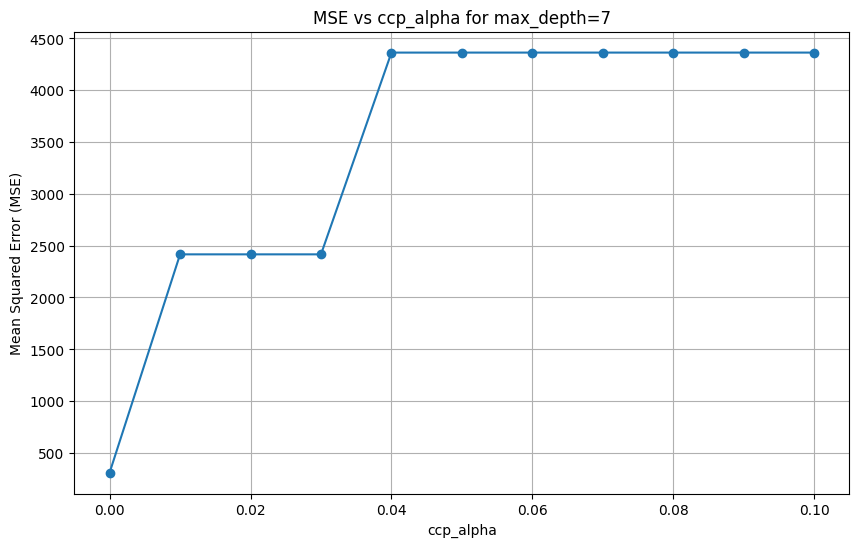

(7, 0.0, 310.4328153564383)

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Exploring different values of max_depth and ccp_alpha
max_depth_options = range(1, 11)  # Exploring depths from 1 to 10
ccp_alpha_options = np.linspace(0, 0.1, 11)  # Exploring ccp_alpha from 0 to 0.1


best_mse = float('inf')
best_max_depth = None
best_ccp_alpha = None
mse_values = []

# Original sales data before log-scaling
original_y_test = np.expm1(y_test)

for max_depth in max_depth_options:
    for ccp_alpha in ccp_alpha_options:
        # Creating and fitting the decision tree regressor
        tree = DecisionTreeRegressor(max_depth=max_depth, ccp_alpha=ccp_alpha, random_state=42)
        tree.fit(X_train, y_train)

        # Predicting and reversing the log scale
        y_pred = np.expm1(tree.predict(X_test))
        mse = mean_squared_error(original_y_test, y_pred)

        # Keeping track of MSE values for the graph
        mse_values.append((ccp_alpha, max_depth, mse))

        # Updating the best parameters if the current MSE is lower
        if mse < best_mse:
            best_mse = mse
            best_max_depth = max_depth
            best_ccp_alpha = ccp_alpha

# Training the best model
best_tree = DecisionTreeRegressor(max_depth=best_max_depth, ccp_alpha=best_ccp_alpha, random_state=42)
best_tree.fit(X_train, y_train)

# Plotting the tree
#plt.figure(figsize=(20, 10))
#plot_tree(best_tree, filled=True)
#plt.title("Regression Tree with max_depth={} and ccp_alpha={}".format(best_max_depth, best_ccp_alpha))
#plt.show()

# Preparing data for MSE vs ccp_alpha graph
mse_values = np.array(mse_values)
mse_values = mse_values[mse_values[:, 1] == best_max_depth]  # Filtering for the best max_depth

# Plotting MSE vs ccp_alpha for the best max_depth
plt.figure(figsize=(10, 6))
plt.plot(mse_values[:, 0], mse_values[:, 2], marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs ccp_alpha for max_depth={}".format(best_max_depth))
plt.grid(True)
plt.show()

best_max_depth, best_ccp_alpha, best_mse

In [9]:
from sklearn.model_selection import KFold
def k_fold():
    # Settings for K-Fold
    n_splits = 10  # Number of folds
    #Highlight here on the random_state 
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=132)

    best_mse = float('inf')
    best_max_depth = None
    best_ccp_alpha = None
    mse_values = []

    for max_depth in max_depth_options:
        for ccp_alpha in ccp_alpha_options:
            mse_fold = []

            for train_index, test_index in kf.split(X_train):
                # Splitting the data into folds
                X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
                y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

                # Creating and fitting the decision tree regressor
                tree = DecisionTreeRegressor(max_depth=max_depth, ccp_alpha=ccp_alpha)
                tree.fit(X_train_fold, y_train_fold)

                # Predicting and reversing the log scale
                y_pred_fold = np.expm1(tree.predict(X_test_fold))
                mse_fold.append(mean_squared_error(np.expm1(y_test_fold), y_pred_fold))

            # Average MSE across folds
            avg_mse = np.mean(mse_fold)
            mse_values.append((ccp_alpha, max_depth, avg_mse))

            # Updating the best parameters if the current average MSE is lower
            if avg_mse < best_mse:
                best_mse = avg_mse
                best_max_depth = max_depth
                best_ccp_alpha = ccp_alpha

    # Training the best model
    best_tree = DecisionTreeRegressor(max_depth=best_max_depth, ccp_alpha=best_ccp_alpha)
    best_tree.fit(X_train, y_train)

    print(best_max_depth, best_ccp_alpha, best_mse)


In [10]:
best_max_depth, best_ccp_alpha, best_mse

(7, 0.0, 310.4328153564383)

In [11]:
for i in range(5): 
    k_fold()

8 0.0 49.282890429600606
7 0.0 39.327069333025094
10 0.0 82.44324931425396
8 0.0 99.90322421034418
9 0.0 69.3655498470848


# Decision tree Original 

In [12]:
train_data=pd.read_csv('Data-train.csv', index_col=0)
test_data=pd.read_csv('Data-Test.csv', index_col=0)
train_data["log-sales"]=np.log(train_data.sales)
y_train=train_data["sales"]
X_train=train_data.drop('sales',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,train_size=0.8, random_state=132)


In [13]:
for i in range(10): 
    k_fold()

D:\anaconda\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input contains infinity or a value too large for dtype('float64').